In [466]:
import pandas as pd
import matplotlib.pyplot as plt

In [467]:
df = pd.read_csv('./df_final.csv')

In [468]:
#Calculate the number of launches on each launchpad.
df['launchpad_name'].groupby(df['launchpad_name']).count()

launchpad_name
CCSFS SLC 40    92
KSC LC 39A      48
VAFB SLC 4E     26
Name: launchpad_name, dtype: int64

Text(0.5, 1.0, 'The number of launches on each launchpad')

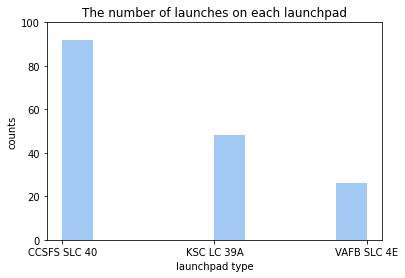

In [471]:
import PyQt5
%matplotlib inline
plt.hist(df['launchpad_name'])
plt.ylim(0,100)
plt.xlabel('launchpad type')
plt.ylabel('counts')
plt.title('The number of launches on each launchpad')

In [472]:
lan = ['CCSFS SLC 40','KSC LC 39A','VAFB SLC 4E']
minlan= []
maxlan = []
for i in lan:
    minlan.append(df[df['launchpad_name']==i]['PayloadMass'].min())
    maxlan.append(df[df['launchpad_name']==i]['PayloadMass'].max())

Text(0.5, 1.0, 'Range of payload mass for each launch site')

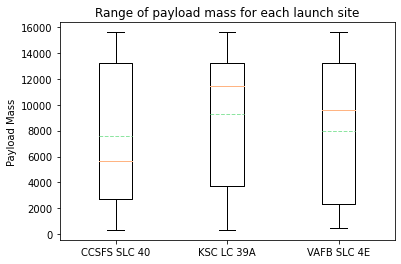

In [473]:
plt.boxplot([df[df['launchpad_name']==i]['PayloadMass'] for i in lan],labels=lan,showmeans=True,meanline=True)
plt.ylabel('Payload Mass')
plt.title('Range of payload mass for each launch site')

In [474]:
for i in lan:
    print(df[df['launchpad_name']==i]['PayloadMass'].describe())

count       92.000000
mean      7614.950177
std       5424.879274
min        350.000000
25%       2713.250000
50%       5650.000000
75%      13260.000000
max      15600.000000
Name: PayloadMass, dtype: float64
count       48.000000
mean      9267.352378
std       5040.139360
min        330.000000
25%       3692.250000
50%      11434.333333
75%      13260.000000
max      15600.000000
Name: PayloadMass, dtype: float64
count       26.000000
mean      7997.047981
std       5125.890701
min        475.000000
25%       2350.000000
50%       9600.000000
75%      13260.000000
max      15600.000000
Name: PayloadMass, dtype: float64


In [475]:
lan = ['CCSFS SLC 40','KSC LC 39A','VAFB SLC 4E']
df[df['launchpad_name']=='VAFB SLC 4E'].groupby('landing_success')['landing_success'].count()
#plt.hist(df[df['launchpad_name']=='CCSFS SLC 40']['landing_success'])

landing_success
False     3
True     23
Name: landing_success, dtype: int64

(array([15., 31., 31.,  1.,  1., 11.,  1., 53., 13.,  5.,  2.,  2.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <BarContainer object of 12 artists>)

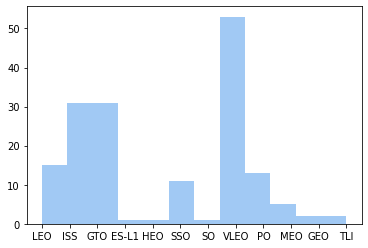

In [476]:
plt.hist(df['orbit'],bins=12)

In [477]:
orbir_index = df['orbit'].groupby(df['orbit']).count().index

Text(0.5, 1.0, 'Range of payload mass for each Orbit')

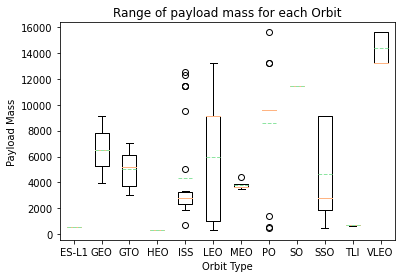

In [478]:
#The range of payload mass for each type of orbit
plt.boxplot([df[df['orbit']==i]['PayloadMass'] for i in orbir_index],labels=orbir_index,showmeans=True,meanline=True)
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass')
plt.title('Range of payload mass for each Orbit')

In [479]:
import seaborn as sns

Text(0.5, 1.0, 'Success rate VS Orbit type')

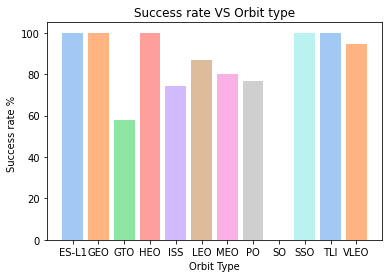

In [481]:
orb = ['LEO','ISS','GTO','ES-L1','HEO','SSO','SO','VLEO','PO','MEO','GEO','TLI']
for i in orbir_index:
    x = df[df['orbit']==i]['landing_success']
    f = 0
    t = 0
    for tf in x:
        if tf:
            t+=1
        else:
            f+=1
    plt.bar(i,t/(t+f)*100)
    #print(t/(t+f))
plt.xlabel('Orbit Type')
plt.ylabel('Success rate % ')
plt.title('Success rate VS Orbit type')

(array([46., 31.,  1.,  1., 11.,  1., 53., 13.,  5.,  4.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

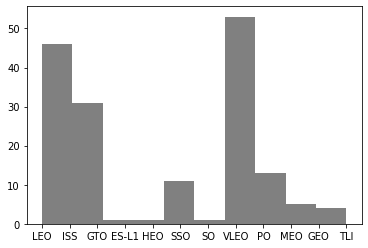

In [482]:
plt.hist(df['orbit'],color='gray',histtype='bar',rwidth=1.0)
# plt.xlabel('Orbit Type')
# plt.ylabel('COUNT ')
# plt.title('COUNT VS Orbit type')

Text(0.5, 1.0, 'The percentage of launches orbit')

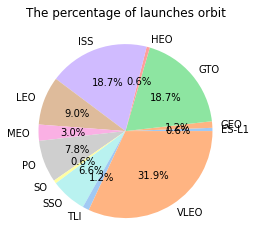

In [483]:
dat = df['orbit'].groupby(df['orbit']).count()
plt.pie(dat,labels=dat.index,autopct='%3.1f%%')
plt.title('The percentage of launches orbit')

In [484]:
string[:-5]

'2010-06-04T18:45:00'

In [485]:
import datetime as dt
string = df['date_utc'][0]
s = string
d = dt.datetime.strptime(s,"%Y-%m-%dT%H:%M:%S.%fZ")

In [487]:
df['date_utc'][1]
dt.datetime.strptime(df['date_utc'][1],"%Y-%m-%dT%H:%M:%S.%fZ").year

2012

In [488]:
df['year']= None
for i in range(len(df)):
    df.loc[i,'year']= dt.datetime.strptime(df['date_utc'].loc[i],"%Y-%m-%dT%H:%M:%S.%fZ").year

In [489]:
year_index = df['year'].unique()

Text(0.5, 1.0, 'launch success yearly trend')

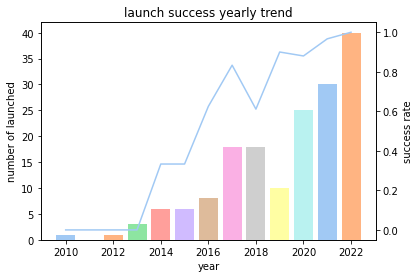

In [490]:
fig,ax1 = plt.subplots()
rate = []
for i in year_index:
    count = 0
    t = 0
    f = 0
    for j in range(len(df)):
        if df.loc[j,'year']==i:
            count+=1
            if df.loc[j,'landing_success']:
                t+=1
            else:
                f+=1
    ax1.bar(i,count)
    rate.append(t/(t+f))
ax2 = ax1.twinx()
ax2.plot(year_index,rate)
ax1.set_xlabel('year')
ax1.set_ylabel('number of launched')
ax2.set_ylabel('success rate')
plt.title('launch success yearly trend')

Text(0.5, 1.0, 'The percentage of launches on each launchpad')

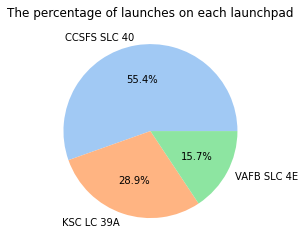

In [491]:
lan = ['CCSFS SLC 40','KSC LC 39A','VAFB SLC 4E']
df['launchpad_name'].groupby(df['launchpad_name']).count()
plt.pie(df['launchpad_name'].groupby(df['launchpad_name']).count(),labels=lan,autopct='%3.1f%%')
plt.title('The percentage of launches on each launchpad')

Text(0.5, 1.0, 'The success rate of KSC LC 39A')

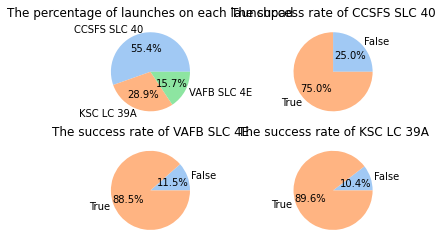

In [492]:
plt.subplot(2,2,1)
plt.pie(df['launchpad_name'].groupby(df['launchpad_name']).count(),labels=lan,autopct='%3.1f%%')
plt.title('The percentage of launches on each launchpad')

plt.subplot(2,2,2)
data1 = df[df['launchpad_name']=='CCSFS SLC 40'].groupby('landing_success')['landing_success'].count()
plt.pie(data1,labels=data1.index,autopct='%3.1f%%')
plt.title('The success rate of CCSFS SLC 40')

plt.subplot(2,2,3)
data2 = df[df['launchpad_name']=='VAFB SLC 4E'].groupby('landing_success')['landing_success'].count()
plt.pie(data2,labels=data2.index,autopct='%3.1f%%')
plt.title('The success rate of VAFB SLC 4E')

plt.subplot(2,2,4)
data3 = df[df['launchpad_name']=='KSC LC 39A'].groupby('landing_success')['landing_success'].count()
plt.pie(data3,labels=data3.index,autopct='%3.1f%%')
plt.title('The success rate of KSC LC 39A')

In [493]:
df.columns

Index(['Unnamed: 0', 'rocket', 'success', 'flight_number', 'date_utc',
       'flight', 'gridfins', 'legs', 'reused_x', 'landing_attempt',
       'landing_success', 'landing_type', 'launchpad_name', 'launch_latitude',
       'launch_longitude', 'launch_attempts', 'launch_successes', 'block',
       'reuse_count', 'rtls_attempts', 'rtls_landings', 'asds_attempts',
       'asds_landings', 'serial', 'PayloadType', 'PayloadMass', 'orbit',
       'landpad_name', 'landpad_latitude', 'landpad_longitude',
       'landing_attempts', 'landing_successes', 'outcome', 'year'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap')

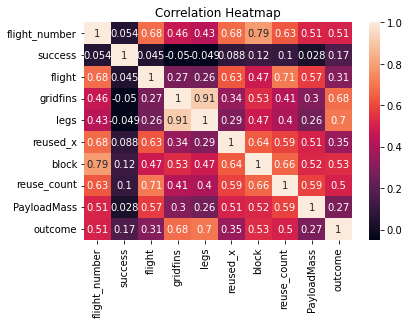

In [494]:
#df.corr()
columns = ['flight_number','success','flight', 'gridfins', 'legs', 'reused_x'
           ,'landing_type','block','reuse_count', 'PayloadType', 'PayloadMass','orbit','outcome']

sns.heatmap(df[columns].corr(),annot=True)
plt.title('Correlation Heatmap')

In [498]:
lis = df['launchpad_name'].unique()
df['launchpad_name'].unique()

array(['CCSFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'], dtype=object)

Text(0.5, 1.0, 'The orbit type of VAFB SLC 4E')

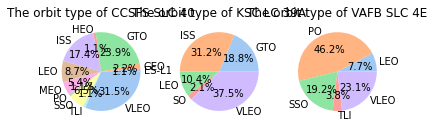

In [513]:
%matplotlib inline
plt.subplot(1,3,1)
d = df[df['launchpad_name']=='CCSFS SLC 40']
data4= d['orbit'].groupby(d['orbit']).count()
plt.pie(data4,labels=data4.index,autopct='%3.1f%%')
plt.title('The orbit type of CCSFS SLC 40')
plt.subplot(1,3,2)
d = df[df['launchpad_name']=='KSC LC 39A']
data4= d['orbit'].groupby(d['orbit']).count()
plt.pie(data4,labels=data4.index,autopct='%3.1f%%')
plt.title('The orbit type of KSC LC 39A')
plt.subplot(1,3,3)
d = df[df['launchpad_name']=='VAFB SLC 4E']
data4= d['orbit'].groupby(d['orbit']).count()
plt.pie(data4,labels=data4.index,autopct='%3.1f%%')
plt.title('The orbit type of VAFB SLC 4E')